<p style="text-align: right">
  <img src="../../assets/images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 🚙 06 - PID: Heading control (SOLUTION)


In [3]:
import numpy as np

# Heading control
# Do not change the name of the function, inputs or outputs. It will break things.

def PIDController(v_0, theta_ref, theta_hat, prev_e, prev_int, delta_t): #add theta_ref as input
    """
    Args:
        v_0 (:double:) linear Duckiebot speed (given).
        theta_ref (:double:) reference heading pose
        theta_hat (:double:) the current estiamted theta.
        prev_e (:double:) tracking error at previous iteration.
        prev_int (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        v_0 (:double:) linear velocity of the Duckiebot 
        omega (:double:) angular velocity of the Duckiebot
        e (:double:) current tracking error (automatically becomes prev_e at next iteration).
        e_int (:double:) current integral error (automatically becomes prev_int at next iteration).
    """
    
   # Tracking error
    e = theta_ref - theta_hat

    # integral of the error
    e_int = prev_int + e*delta_t

    # anti-windup - preventing the integral error from growing too much
    e_int = max(min(e_int,2),-2)

    # derivative of the error
    e_der = (e - prev_e)/delta_t

    # controller coefficients
    Kp = 5
    Ki = 0.2
    Kd = 0.1

    # PID controller for omega
    omega = Kp*e + Ki*e_int + Kd*e_der
    u = omega
    print(f"\n\nDelta time : {delta_t} \nE : {np.rad2deg(e)} \nE int : {e_int} \nPrev e : {prev_e} \nU : {u} \nTheta hat: {np.rad2deg(theta_hat)} \n")
     
    return v_0, omega, e, e_int



Delta time : 0.02 
E : 50.0 
E int : 0.017453292519943295 
Prev e : 0.8726646259971648 
U : 4.366813788489813 
Theta hat: 0.0 



Delta time : 0.02 
E : 44.995999999999995 
E int : 0.033159859524490666 
Prev e : 0.8726646259971648 
U : 3.496592344192759 
Theta hat: 5.004000000000001 



Delta time : 0.02 
E : 40.98920032 
E int : 0.047467789591360936 
Prev e : 0.7853283502273685 
U : 3.236816840216563 
Theta hat: 9.01079968 



Delta time : 0.02 
E : 37.280081439974396 
E int : 0.06048099292214458 
Prev e : 0.7153965033435133 
U : 2.941715347258682 
Theta hat: 12.7199185600256 



Delta time : 0.02 
E : 33.90912396143872 
E int : 0.07231751011402475 
Prev e : 0.650660166539182 
U : 2.6794212652669795 
Theta hat: 16.090876038561277 



Delta time : 0.02 
E : 30.838733360690707 
E int : 0.08308225879979812 
Prev e : 0.5918258595940085 
U : 2.439861496676606 
Theta hat: 19.161266639309297 



Delta time : 0.02 
E : 28.042858033569868 
E int : 0.09287106288690086 
Prev e : 0.538237434288

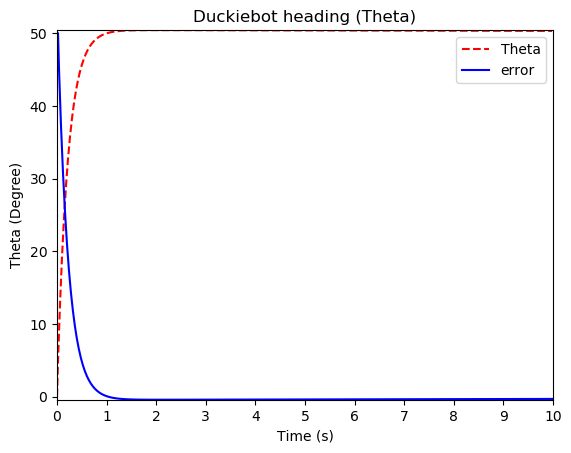

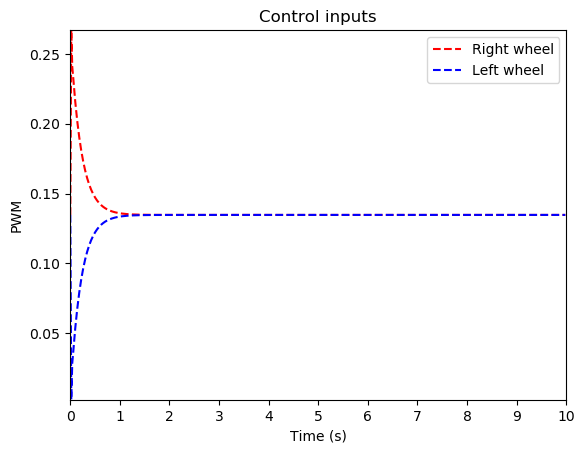



Delta time : 0.02 
E : 50.6069612301307 
E int : 0.01766516195789801 
Prev e : 0 
U : 8.836114011340584 
Theta hat: -0.6069612301306978 



Delta time : 0.02 
E : 41.545038126887505 
E int : 0.0321671160215133 
Prev e : 0.8832580978949005 
U : 2.8411199655374473 
Theta hat: 8.454961873112495 



Delta time : 0.02 
E : 38.50879745372912 
E int : 0.04560922215253694 
Prev e : 0.7250977031807647 
U : 3.104686394038503 
Theta hat: 11.491202546270873 



Delta time : 0.02 
E : 35.253056659472016 
E int : 0.05791486035453494 
Prev e : 0.672105306551182 
U : 2.8038755403139977 
Theta hat: 14.746943340527986 



Delta time : 0.02 
E : 32.23289643244626 
E int : 0.06916626375854537 
Prev e : 0.6152819100999001 
U : 2.5631254042574207 
Theta hat: 17.767103567553736 



Delta time : 0.02 
E : 29.717262449123158 
E int : 0.07953954524687483 
Prev e : 0.5625701702005212 
U : 2.389697802211499 
Theta hat: 20.282737550876845 



Delta time : 0.02 
E : 27.85317841830604 
E int : 0.08926213865777216 

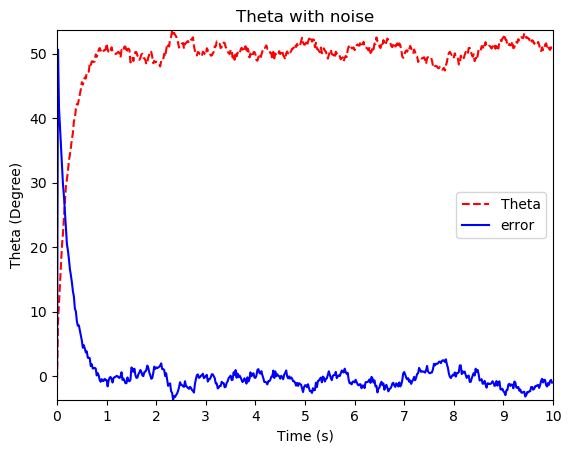

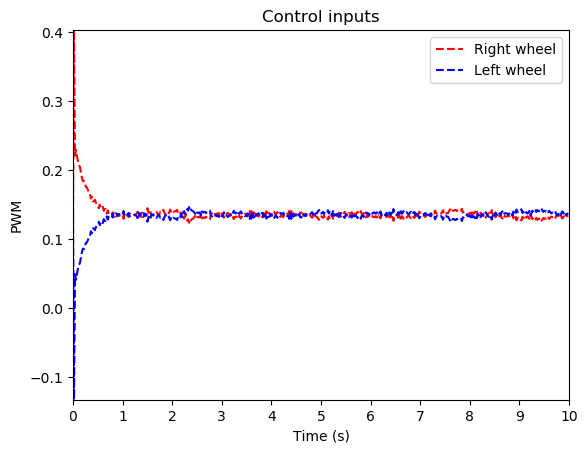

In [4]:
import matplotlib.pyplot as plt
import numpy as np 

import sys
sys.path.append('../../')
from tests.unit_test import UnitTestHeadingPID

# This is for quick testing purposes only - you can try different values of v_init and R, L or the ones you determined before. Try to change R, L for fun.
v_test = 0.2
R_test = 0.033 # m
baseline_test = 0.09 # m
gain_test = 0.6 
trim_test = 0 
thata_ref= 50*np.pi/180 # in rad

# Sanity check (not a faithful representation of the actual behavior, given the motion model is assumed to be exactly known)
unit_test = UnitTestHeadingPID(R_test, baseline_test, v_test,thata_ref, gain_test, trim_test, PIDController) 
unit_test.test()